網上爬蟲抓取 小道瓊日線 2019/12/2~2020/3/27資料

In [ ]:
from selenium import webdriver
import pymysql
from time import sleep as sl
import csv

driver = webdriver.Chrome()
driver.get("https://finance.yahoo.com/quote/YM%3DF/history?period1=1572220800&period2=1585353600&interval=1d&filter=history&frequency=1d")

r_list = driver.find_elements_by_xpath('//*[@class="W(100%) M(0)"]/tbody/tr')
title = driver.find_element_by_xpath('//*[@class="W(100%) M(0)"]/thead')

columnName = title.text.split()
xList = []
for i in r_list:
    xList.append(i.text.split(','))

f = open('minYM.csv',"a+")
csvWriter = csv.writer(f)

csvWriter.writerow(columnName)
for i in xList:
    csvWriter.writerow(i)


sl(2)

driver.quit()

In [1]:
#顯示抓取資料前10筆
f=open('minYM.csv','r',encoding='UTF-8')
data=f.readlines()

print(data[:10])

f.close()

['Date,Open,High,Low,Close*,Adj,Close**,Volume\n', 'Mar 27, 2020 22,123.00 22,321.00 21,316.00 21,410.00 21,410.00 98,666,789\n', 'Mar 26, 2020 20,998.00 22,545.00 20,510.00 22,492.00 22,492.00 123,364,604\n', 'Mar 25, 2020 20,446.00 21,892.00 20,279.00 21,100.00 21,100.00 130,872,632\n', 'Mar 24, 2020 18,987.00 20,943.00 18,925.00 20,511.00 20,511.00 106,863,898\n', 'Mar 23, 2020 18,230.00 19,804.00 18,088.00 18,745.00 18,745.00 119,535,345\n', 'Mar 22, 2020 18,504.00 18,507.00 18,086.00 18,238.00 18,238.00 204,991\n', 'Mar 20, 2020 19,583.00 20,882.00 18,825.00 19,875.00 19,875.00 285,733\n', 'Mar 19, 2020 19,900.00 20,393.00 18,834.00 19,853.00 19,853.00 239,922\n', 'Mar 18, 2020 20,715.00 20,845.00 18,766.00 20,860.00 20,860.00 228,910\n']


In [2]:
#使用excel 更改日期格式 只保留 Date,Open,High,Low,Close 資料
#將日期排序 由遠至近 更改後的資料 前10筆
f=open('cminYM.csv','r',encoding='UTF-8')
data=f.readlines()

print(data[:10])

['2019/12/2 28082.00 28197.00 27772.00 27789.00 \n', '2019/12/3 27788.00 27847.00 27312.00 27487.00 \n', '2019/12/4 27478.00 27727.00 27397.00 27643.00 \n', '2019/12/5 27644.00 27773.00 27558.00 27678.00 \n', '2019/12/6 27688.00 28039.00 27675.00 28014.00 \n', '2019/12/9 28020.00 28047.00 27878.00 27902.00 \n', '2019/12/13 28181.00 28303.00 28036.00 28168.00 \n', '2019/12/16 28192.00 28345.00 28159.00 28253.00 \n', '2019/12/17 28235.00 28335.00 28173.00 28276.00 \n', '2019/12/18 28257.00 28327.00 28238.00 28266.00 \n']


繪製k線圖 2019/12/2~2020/2/28

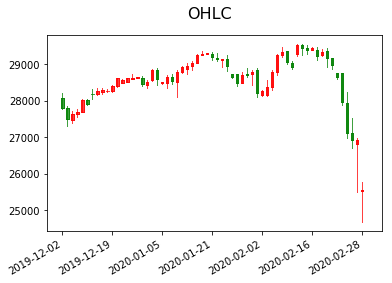

In [2]:
import matplotlib.pyplot as mp
import matplotlib.dates as md
import datetime as dt
import numpy as np
from mpl_finance import candlestick2_ochl
%matplotlib inline 

f=open('cminYM.csv','r',encoding='UTF-8')
l=[]
data=f.readlines()
for line in data: 
    data2=line.replace('.00','')
    data3=data2.strip('\n')
    data4=data3.split()
    l.append(data4)

f.close()


startTime=dt.datetime.strptime("2019/12/2","%Y/%m/%d").date()

time11=[]

Kbar=[]
for i in range(len(l)):
    time=dt.datetime.strptime(l[i][0],"%Y/%m/%d").date()
    if len(Kbar)==0:
        if time==startTime:
            Kbar.append([startTime,int(l[i][1]),int(l[i][2]),int(l[i][3]),int(l[i][4])])
            time11.append(startTime)
    else:
        Kbar.append([time,int(l[i][1]),int(l[i][2]),int(l[i][3]),int(l[i][4])])
        time11.append(time)
        
kk={}

kk['open']=np.array([float(i[1]) for i in Kbar])
kk['high']=np.array([float(i[2]) for i in Kbar])
kk['low']=np.array([float(i[3]) for i in Kbar])
kk['close']=np.array([float(i[4]) for i in Kbar])


# 定義圖片名稱
fig = mp.figure()
fig.suptitle("OHLC", fontsize=16)

# 定義圖表物件
ax1 = mp.subplot(111)

#x軸
ax1.set_xticks(range(0,len(time11),10))  # 10個為一組
ax1.set_xticklabels(time11[::10])        # 10個為一組

# 繪製K線圖
candlestick2_ochl(ax1, kk['open'],kk['close'],kk['high'],kk['low'], width=0.5, colorup="r", colordown='g')

#字幕斜
mp.gcf().autofmt_xdate() 

# 顯示繪製圖表
mp.show()
